<h3 style="text-align: center;"><b>Implementing Simple Linear Regression From Scratch (with Gradient Descent)</b> </h3>
<h5 style="text-align: center;"> This notebook is adapted and adds onto this wonderful tutorial by Arseniy Tyurin found here:
<br><a href="https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc/" target="_blank">https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc/</a></h5>

<h5 style="text-align: center;"> <a href="https://en.wikipedia.org/wiki/Simple_linear_regression" target="_blank">https://en.wikipedia.org/wiki/Simple_linear_regression</a></h5>
<h5 style="text-align: center;"> <a href="https://en.wikipedia.org/wiki/Gradient_descent" target="_blank">https://en.wikipedia.org/wiki/Gradient_descent</a></h5>
<h5 style="text-align: center;">This notebook is similiar to Notebook 1, except it uses Gradient Descent</h5>
<h5 style="text-align: center;">We still have <code>y = &alpha; x + &beta; </code></h5>
<h5 style="text-align: center;">But now we estimate the coeffiecients not by rewriting the formula, but by writing it in terms of a function f(&alpha;,&beta;) where &alpha; and &beta; are that in the formula.</h5>
<h5 style="text-align: center;">The formula we are going to make as a function is Mean Squared Error which is the square of RMSE we explored in the previous notebook</h5>
$$ \text{MSE = } \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
$$ \text{Where } \hat{y_i} \text{ we know to be } \hat{y_i} = \alpha x + \beta $$
$$ \text{This derives to } f(\alpha, \beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \alpha x_i - \beta)^2 $$
$$ \text{We want to take the min of this; so, } \min_{\alpha, \beta}f(\alpha, \beta) $$
$$ \text{We now want to take the partial deriv with respect to } \alpha \text{ and } \beta $$
$$ \frac{\partial f}{\partial \alpha} = \frac{1}{n} \sum_{i=1}^{n} -2x_i(y_i - \alpha x_i - \beta) \text{ and} $$
<h5 style="text-align: center;">In code:<code>(-2*sum(X*(Y - alpha*X - beta))) / n</code></h5>
$$ \frac{\partial f}{\partial \beta} = \frac{1}{n} \sum_{i=1}^{n} -2(y_i - \alpha x_i - \beta) $$
<h5 style="text-align: center;">In code:<code>(-2*sum((Y - alpha*X - beta))) / n</code></h5>
<h5 style="text-align: center;">We then multiply it by some learning rate and subtract it from the previous alpha and beta</h5><h5 style="text-align: center;">The reason we subtract is because we are trying to minimze the error function. If we wanted to maximize it we would add the partials to the previous alpha and beta. <a href="https://medium.com/@aerinykim/why-do-we-subtract-the-slope-a-in-gradient-descent-73c7368644fa" target="_blank">This post</a> by Aerin Kim goes into a little more detail.</h5>
<h5 style="text-align: center;">We do this for e number of epochs and pretty soon we converge to an optimal minima.</h5>

0.9966594980280533 1.0075937461661377


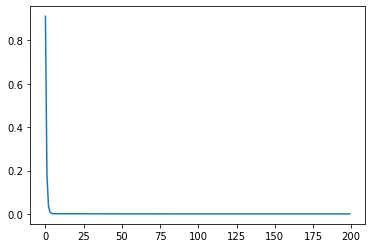

In [150]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_for_linear_regression(X, Y, lr=0.05, epochs=1000):
    alpha = random()
    beta = random()
    n = len(X)
    mse_details = []
    for _ in range(epochs):
        partial_of_alpha = (-2*sum(X*(Y - alpha*X - beta))) / n
        partial_of_beta = (-2*sum((Y - alpha*X - beta))) / n
        alpha -= lr*partial_of_alpha
        beta -= lr*partial_of_beta
        mse_details.append(sum((Y - alpha*X - beta)**2)/n)
    print(alpha, beta)
    return alpha, beta, mse_details

X = np.array([1, 2, 3])
Y = np.array([2, 3, 4])

epochs = 200
alpha, beta, mse = gradient_descent_for_linear_regression(X, Y, epochs=epochs)

epochs_array = [x for x in range(epochs)]
plt.plot(epochs_array, mse)
plt.show()

"""
TODO: For some reason if a lot more data is added the program overflows. I think this is because 
 the way the program is mulitplying is very ineffienct so in real life these should be numpy multiplications 
 which should be far more efficient. For this demo tho that is not necessary (see issue 2)
"""

In [163]:
class LinearRegressionUtils:
    def coefficients(self, X, Y, lr, epochs):
        alpha = random()
        beta = random()
        n = len(X)
        for _ in range(epochs):
            partial_of_alpha = (-2*sum(X*(Y - alpha*X - beta))) / n
            partial_of_beta = (-2*sum((Y - alpha*X - beta))) / n
            alpha -= lr*partial_of_alpha
            beta -= lr*partial_of_beta
        return alpha, beta
    
class LinearRegression(LinearRegressionUtils):
    """
    Demo Linear Regression class using Gradient Descent
    """
    def fit(self, X, Y, lr=0.05, epochs=1000):
        """
        X and Y to fit, lr = learning rate, epochs = num epochs to iterate over
        """
        self.X = X
        self.Y = Y
        self.lr = lr
        self.epochs = epochs
        self.coef_, self.intercept_ = LinearRegressionUtils.coefficients(self, X=self.X, Y=self.Y, lr=self.lr, epochs=self.epochs)
        self.predictions = []
        for i in range(len(self.X)):
            self.predictions.append(self.predict(self.X[i]))
        
    def predict(self, x):
        return self.intercept_ + self.coef_ * x

In [170]:
X = np.array([1, 2, 3])
Y = np.array([2, 3, 4])
reg = LinearRegression()
reg.fit(X, Y)
print("Alpha:", reg.coef_)
print("Beta:", reg.intercept_)
print("Prediction:", reg.predict(34))

Alpha: 1.0000010414609357
Beta: 0.9999976325144981
Prediction: 35.00003304218632


In [175]:
from sklearn.linear_model import LinearRegression
X = np.array(X).reshape(-1, 1)
y = np.array(Y).reshape(-1, 1)
reg2 = LinearRegression().fit(X, y)
print("Alpha:", reg2.coef_)
print("Beta:", reg2.intercept_)
print("Prediction:", reg2.predict(np.array(34).reshape(1, -1)))

Alpha: [[1.]]
Beta: [1.]
Prediction: [[35.]]
